In [1]:
# Importamos las librerías para trabajar con Beam Search
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [2]:
# Grafo representado como un diccionario de diccionarios
grafo = {
    'A': {'B': 4, 'C': 1, 'D': 7},
    'B': {'A': 4, 'E': 1, 'F': 7},
    'C': {'A': 1},
    'D': {'A': 7, 'G': 2, 'H': 6, 'I': 1},
    'E': {'B': 1},
    'F': {'B': 7, 'J': 3, 'K': 5},
    'G': {'D': 2, 'L': 3, 'M': 10},
    'H': {'D': 6},
    'I': {'D': 1, 'N': 7, 'O': 6, 'P': 9},
    'J': {'F': 3},
    'K': {'F': 5, 'Q': 5, 'R': 8},
    'L': {'G': 3},
    'M': {'G': 10, 'S': 15, 'T': 5},
    'N': {'I': 7},
    'O': {'I': 6},
    'P': {'I': 9},
    'Q': {'K': 5},
    'R': {'K': 8},
    'S': {'M': 15},
    'T': {'M': 5}
}

In [3]:
# Crear un grafo de NetworkX y agregar nodos y aristas
G = nx.Graph()
for nodo, vecinos in grafo.items():
    for vecino, peso in vecinos.items():
        G.add_edge(nodo, vecino, weight=peso)

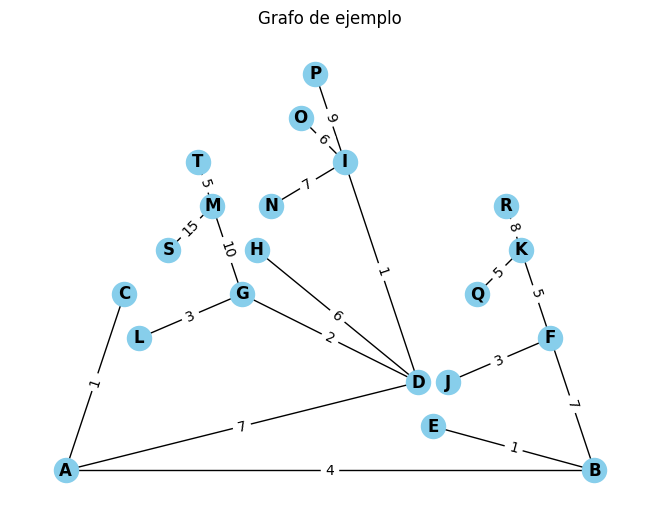

In [14]:
# Dibujar el grafo
pos = nx.planar_layout(G)
labels = nx.get_edge_attributes(G, 'weight') # Asignamos los pesos (valores) que se verán en la red
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo de ejemplo')
plt.show()

In [5]:
def beam_search_simple(graph, start, goal, beam_width):
    pq = PriorityQueue()
    pq.put((0, [start]))  # (cost, path)

    while not pq.empty():
        cost, path = pq.get()
        print("-----------")
        print("Path:", path)
        node = path[-1]

        if node == goal:
            return path, cost

        # Get neighbors of the current node, sorted by cost
        neighbors = sorted(graph[node].items(), key=lambda x: x[1])
        print("neighbors", neighbors)

        # Only consider up to 'beam_width' neighbors
        for next_node, weight in neighbors[:beam_width]:
            if next_node not in path:  # Avoid cycles
                pq.put((cost + weight, path + [next_node]))

    return None, float('inf')  # If no path is found

In [6]:
# Perform beam search on the graph
path, total_cost = beam_search_simple(grafo, 'A', 'T', 2)
print(f"Path: {path}, Total Cost: {total_cost}")

-----------
Path: ['A']
neighbors [('C', 1), ('B', 4), ('D', 7)]
-----------
Path: ['A', 'C']
neighbors [('A', 1)]
-----------
Path: ['A', 'B']
neighbors [('E', 1), ('A', 4), ('F', 7)]
-----------
Path: ['A', 'B', 'E']
neighbors [('B', 1)]
Path: None, Total Cost: inf
